<h1>Load Tokenizer and Instantiate Model</h1>

In [1]:
from rnn_module2 import RNNModule2
import torch
import sentencepiece as spm
from transformers import BertTokenizer  # Or any other tokenizer you prefer

# Trained tokenizer
sp = spm.SentencePieceProcessor()
model_prefix = "bpe_tokenizer"
sp.load(f'{model_prefix}.model')
tokenizer = sp

device = "mps"

# rnn_model = RNNModule2(tokenizer.get_piece_size())
# rnn_model.to(device)

<h1>Load Model</h1>

In [2]:
from gru_module import GRUModule
import torch
import sentencepiece as spm
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_NAME = "rnn_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

rnn_model = RNNModule2(sp.get_piece_size()).to("mps")

# Load the saved state_dict of module_0 
rnn_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

<h1>Train model</h1>

In [3]:
from textdataset import TextDataSet
import os

training_losses, validation_losses = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).train_model(rnn_model, 2)

/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/3
-------------------------------
Length of training set: 248
Epoch 1/3, Training Loss: 5.5933 | Validation loss: 5.559732867825415
Epoch 2/3
-------------------------------
Length of training set: 248
Epoch 2/3, Training Loss: 5.5884 | Validation loss: 5.559247470671131
Train time: 46.796 seconds


<h1>Visualize</h1>

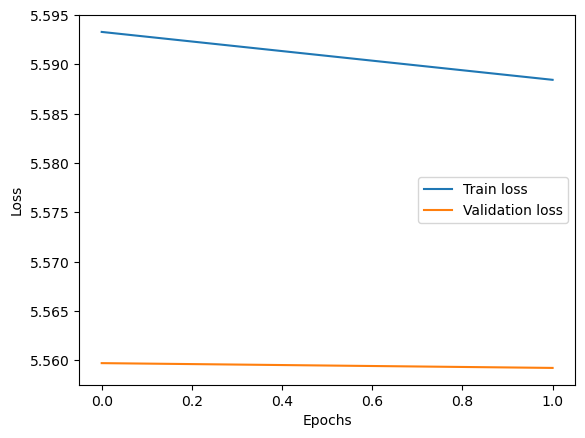

In [4]:
import matplotlib.pyplot as plt
# plot the loss curves
plt.plot(training_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

<h1>Save model</h1>

In [5]:
# # Saving our PyTorch model
# from pathlib import Path

# # 1. Create model's directory
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)

# # 2. Create model save path
# MODEL_NAME = "rnn_language_model.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# # 3. Save the model state dict
# torch.save(obj=rnn_model.state_dict(),f=MODEL_SAVE_PATH)
# print("saving complete")

<h1>Evaluate model</h1>

In [6]:
from textdataset import TextDataSet
import os

tds = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).evalutate_model(rnn_model)

Perplexity: 272.3248291015625 | Bleu score: 0.0012074100782876467


<h1>Generate from prompts</h1>

In [7]:
# Example usage of the generate method
#prompt = "unless he wished to show that he, too, could have an opinion, but he urged that at this point the army should unite and there await the enemy. It was plain that Armfeldt had thought out that plan long ago and now expounded it not so much to answer the questions putwhich, in fact, his plan did"
prompt = "Which do you prefer? Dogs or cats?"
generated_text = rnn_model.generate(sp, prompt, max_length=50, eos_token_id=2, temperature=0.9, device="mps")
print(f"Generated text: {generated_text}")

Generated text: The one another one the arch to the small completely means, would have been brought. I will it! in the whole to drive, since she took them of some meeded to the angel of seeing two by a weeka away all it the
